# Applied Machine Learning Homework 5
### Po-Chieh Liu (pl2441), Peter Grantcharov (pdg2116)

# Task 2 
Train a **multilayer perceptron (fully connected)** on the **Fashion MNIST dataset** using the
**traditional train/test** split as given by **fashion_mnist.load_data in keras**. Use a separate **10000
samples (from the training set) for model selection** and to compute **learning curves** (**accuracy
vs epochs**, not vs n_samples). Compare a “vanilla” model with a model using **drop-out**
(potentially a bigger model), and to a model using **batch normalization** and **residual
connections** (but not dropout). Visualize learning curves for all models.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
# scale
X_train = X_train/255
X_test = X_test/255


Confirm that we have a balanced data set:

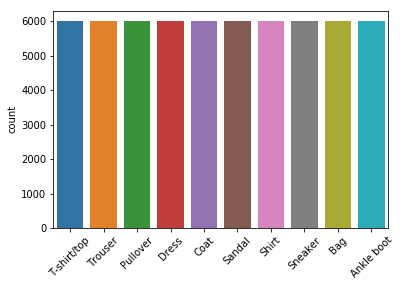

In [4]:
ax = sns.countplot(y_train)
_= ax.set_xticklabels(['T-shirt/top','Trouser','Pullover',
                       'Dress','Coat','Sandal','Shirt',
                       'Sneaker','Bag','Ankle boot'],
                      rotation=45)

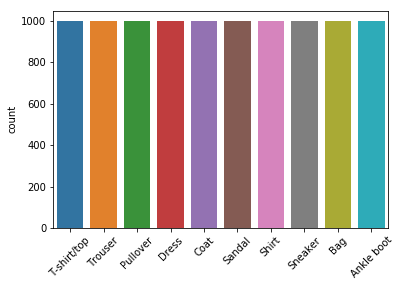

In [5]:
ax = sns.countplot(y_test)
_= ax.set_xticklabels(['T-shirt/top','Trouser','Pullover',
                       'Dress','Coat','Sandal','Shirt',
                       'Sneaker','Bag','Ankle boot'],
                      rotation=45)

Check GPU status

In [6]:
# tf
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
from keras import backend
backend.tensorflow_backend._get_available_gpus()


['/job:localhost/replica:0/task:0/device:GPU:0']

# Base 'Vanilla' Model

In [0]:
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input, add, Activation
from keras import regularizers
from keras import Model


In [8]:
# 1 layer model
# initiate model
model_vanilla1 = Sequential()

# flatten layer
model_vanilla1.add(Flatten(input_shape = (28,28)))

# first layer
model_vanilla1.add(Dense(128, 
                input_dim = 784, 
                activation='relu'))

# output layer
model_vanilla1.add(Dense(10, activation='softmax'))

# compile
model_vanilla1.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model_vanilla1.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
vanilla1 = model_vanilla1.fit(X_train, 
                              y_train, 
                              epochs=50, 
                              validation_split=10000/60000)


Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.5173 - acc: 0.8194 - val_loss: 0.4834 - val_acc: 0.8362
Epoch 2/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.3885 - acc: 0.8603 - val_loss: 0.3857 - val_acc: 0.8610
Epoch 3/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.3461 - acc: 0.8744 - val_loss: 0.3405 - val_acc: 0.8770
Epoch 4/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.3189 - acc: 0.8836 - val_loss: 0.3610 - val_acc: 0.8671
Epoch 5/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.3021 - acc: 0.8898 - val_loss: 0.3286 - val_acc: 0.8812
Epoch 6/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.2831 - acc: 0.8954 - val_loss: 0.3389 - val_acc: 0.8762
Epoch 7/50
50000/50000 [==============================] - 4s 88us/step - loss: 0

In [30]:
print('Vanilla modeltest score:',
      model_vanilla1.evaluate(X_test, y_test))

10000/10000 [==============================] - 0s 40us/step
Vanilla modeltest score: [0.5406438440233469, 0.8806]


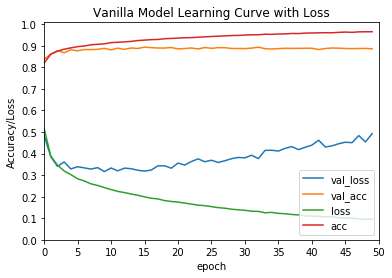

In [27]:
_ = pd.DataFrame(vanilla1.history).plot(
    title = 'Vanilla Model Learning Curve with Loss',
    xticks = range(0,51,5),
    yticks = [0.1* x for x in range(0,11)]
)
_ = plt.legend(loc = 4)
_ = plt.xlabel('epoch')
_ = plt.ylabel('Accuracy/Loss')


#### Quick observation
Validation accuracy starts to flatten at around 5 epochs, while the validation loss bottoms out at about epoch 5, and thereafter steadily increases until the end. 


#### Larger and Deeper Vanilla Model
6 layers with 512 cells

In [28]:
# 6 layers model with 512 cells
# initiate model
model_vanilla2 = Sequential()

# flatten layer
model_vanilla2.add(Flatten(input_shape = (28,28)))

# first layer
model_vanilla2.add(Dense(512, 
                input_dim = 784, 
                activation='relu'))

# second
model_vanilla2.add(Dense(512, 
                activation='relu'))

# third
model_vanilla2.add(Dense(512,
                activation='relu'))

# fourth
model_vanilla2.add(Dense(512,
                activation='relu'))

# fifth
model_vanilla2.add(Dense(512, 
                activation='relu'))

# sixth
model_vanilla2.add(Dense(512, 
                activation='relu'))

# output layer
model_vanilla2.add(Dense(10, activation='softmax'))

# compile
model_vanilla2.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model_vanilla2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
__________

In [29]:
vanilla2 = model_vanilla2.fit(X_train, 
                              y_train, 
                              epochs=50, 
                              validation_split= 10000/60000)


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.5558 - acc: 0.7994 - val_loss: 0.4293 - val_acc: 0.8422
Epoch 2/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.4151 - acc: 0.8527 - val_loss: 0.4933 - val_acc: 0.8344
Epoch 3/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.3781 - acc: 0.8652 - val_loss: 0.4813 - val_acc: 0.8350
Epoch 4/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.3495 - acc: 0.8744 - val_loss: 0.3766 - val_acc: 0.8727
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.3254 - acc: 0.8822 - val_loss: 0.3963 - val_acc: 0.8699
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.3159 - acc: 0.8876 - val_loss: 0.3419 - val_acc: 0.8772
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.2969 - acc: 0.8938 - val_loss: 0.3594 - 

In [31]:
print('Vanilla model 2 test score:',
      model_vanilla2.evaluate(X_test, y_test))


10000/10000 [==============================] - 0s 46us/step
Vanilla model 2 test score: [0.49062124730870127, 0.8858]


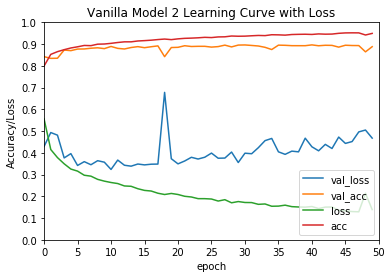

In [32]:
_ = pd.DataFrame(vanilla2.history).plot(
    title = 'Vanilla Model 2 Learning Curve with Loss',
    xticks = range(0,51,5),
    yticks = [0.1* x for x in range(0,11)]
)
_ = plt.legend(loc = 4)
_ = plt.xlabel('epoch')
_ = plt.ylabel('Accuracy/Loss')


#### Quick observation

For the deeper and larger vanilla model, the validation accuracy also starts to flatten at around the fifth epoch, while the validation loss seems to bottom out at around 15. It then has a very odd spike, but seems to correct itself and then steadily rise after that.

# Dropout Model

In [33]:
# 1 layer
# initiate model
model_dropout1 = Sequential()

# flatten layer
model_dropout1.add(Flatten(input_shape = (28,28)))

# first layer
model_dropout1.add(Dense(128, 
                input_dim = 784, 
                activation='relu'))

# drop out layer
model_dropout1.add(Dropout(rate = 0.5))

# output layer
model_dropout1.add(Dense(10, activation='softmax'))

# compile
model_dropout1.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_dropout1.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
dropout1 = model_dropout1.fit(X_train, 
                              y_train, 
                              epochs=50, 
                              validation_split= 10000/60000)


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.6433 - acc: 0.7741 - val_loss: 0.4476 - val_acc: 0.8393
Epoch 2/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.4833 - acc: 0.8257 - val_loss: 0.4111 - val_acc: 0.8490
Epoch 3/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.4494 - acc: 0.8379 - val_loss: 0.3703 - val_acc: 0.8664
Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.4260 - acc: 0.8448 - val_loss: 0.3973 - val_acc: 0.8492
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.4111 - acc: 0.8506 - val_loss: 0.3648 - val_acc: 0.8672
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.4002 - acc: 0.8541 - val_loss: 0.3470 - val_acc: 0.8750
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3900 - acc: 0.8578 - val_loss: 0.3516 - val_acc

In [35]:
print('Dropout model 1 test score:',
      model_dropout1.evaluate(X_test, y_test))


10000/10000 [==============================] - 0s 44us/step
Dropout model 1 test score: [0.36197602721452715, 0.883]


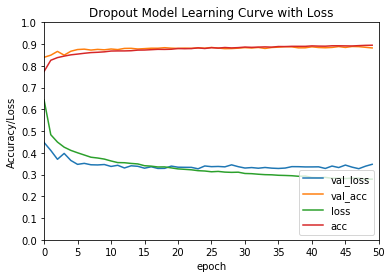

In [37]:
_ = pd.DataFrame(dropout1.history).plot(
    title = 'Dropout Model Learning Curve with Loss',
    xticks = range(0,51,5),
    yticks = [0.1* x for x in range(0,11)]
)
_ = plt.legend(loc = 4)
_ = plt.xlabel('epoch')
_ = plt.ylabel('Accuracy/Loss')


#### Quick observation

Both training and validation accuracy flatten at a level around 0.85~0.9. In comparison with the vanilla model, the training accuracy doesn't appear to be overfitted which reached 1, and also saw the validation loss steadily rise as it was approaching 1.

#### Larger and deeper dropout model

In [38]:
# initiate model
model_dropout2 = Sequential()

# flatten layer
model_dropout2.add(Flatten(input_shape = (28,28)))

# first layer
model_dropout2.add(Dense(512, 
                input_dim = 784, 
                activation='relu'))

# drop out layer
model_dropout2.add(Dropout(rate = 0.5))

# second layer
model_dropout2.add(Dense(512, 
                activation='relu'))

# drop out layer
model_dropout2.add(Dropout(rate = 0.5))

# third layer
model_dropout2.add(Dense(512, 
                activation='relu'))

# drop out layer
model_dropout2.add(Dropout(rate = 0.5))

# fourth layer
model_dropout2.add(Dense(512, 
                activation='relu'))

# drop out layer
model_dropout2.add(Dropout(rate = 0.5))

# fifth layer
model_dropout2.add(Dense(512, 
                activation='relu'))

# drop out layer
model_dropout2.add(Dropout(rate = 0.5))

# sixth layer
model_dropout2.add(Dense(512, 
                activation='relu'))

# drop out layer
model_dropout2.add(Dropout(rate = 0.5))

# output layer
model_dropout2.add(Dense(10, activation='softmax'))

# compile
model_dropout2.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_dropout2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

In [39]:
dropout2 = model_dropout2.fit(X_train, 
                              y_train, 
                              epochs=50, 
                              validation_split=10000/60000)


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.0096 - acc: 0.6020 - val_loss: 0.6199 - val_acc: 0.7668
Epoch 2/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.7129 - acc: 0.7362 - val_loss: 0.5535 - val_acc: 0.8040
Epoch 3/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.6647 - acc: 0.7648 - val_loss: 0.5423 - val_acc: 0.8123
Epoch 4/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.6460 - acc: 0.7766 - val_loss: 0.5308 - val_acc: 0.8111
Epoch 5/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.6257 - acc: 0.7862 - val_loss: 0.5363 - val_acc: 0.7986
Epoch 6/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.6193 - acc: 0.7891 - val_loss: 0.5462 - val_acc: 0.7971
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.6091 - acc: 0.7930 - val_loss: 0.5093 - 

In [40]:
print('Dropout model 2 test score:', 
      model_dropout2.evaluate(X_test, y_test))


10000/10000 [==============================] - 0s 44us/step
Dropout model 2 test score: [0.6149588119506836, 0.8166]


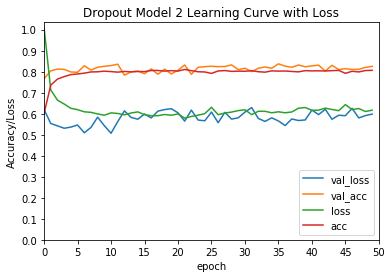

In [42]:
_ = pd.DataFrame(dropout2.history).plot(
    title = 'Dropout Model 2 Learning Curve with Loss',
    xticks = range(0,51,5),
    yticks = [0.1* x for x in range(0,11)]
)
_ = plt.legend(loc = 4)
_ = plt.xlabel('epoch')
_ = plt.ylabel('Accuracy/Loss')


#### Quick observation

The larger and deeper net with dropout can effectively control the overfitting, as can be seen in this chart. The training and validation scores are much closer together, while the validation loss does not exhibit the steady increase in the later epochs, as was noticed earlier. This generalizability came at a cost in terms of accuracy, though, as the ended around 0.8. 


# Batch Normalization and Residual Connection Model

In [43]:
# 1 layer model, which can't adopt res connect in this 
# initiate model
model_batch1 = Sequential()

# flatten layer
model_batch1.add(Flatten(input_shape = (28,28)))

# first layer
model_batch1.add(Dense(128, 
                input_dim = 784, 
                activation='relu'))

# batchnormalize layer
model_batch1.add(BatchNormalization())

# output layer
model_batch1.add(Dense(10, activation='softmax'))

# compile
model_batch1.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_batch1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
_________________________________________________________________


In [44]:
batch1 = model_batch1.fit(X_train, 
                          y_train, 
                          epochs=50, 
                          validation_split=10000/60000)


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.4980 - acc: 0.8264 - val_loss: 0.4530 - val_acc: 0.8378
Epoch 2/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.4037 - acc: 0.8571 - val_loss: 0.4108 - val_acc: 0.8553
Epoch 3/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.3725 - acc: 0.8670 - val_loss: 0.5161 - val_acc: 0.8219
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.3536 - acc: 0.8733 - val_loss: 0.3885 - val_acc: 0.8520
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.3396 - acc: 0.8768 - val_loss: 0.3650 - val_acc: 0.8663
Epoch 6/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.3270 - acc: 0.8811 - val_loss: 0.3675 - val_acc: 0.8687
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.3181 - acc: 0.8822 - val_loss: 0.3717 - 

In [45]:
print('Batch normalized model 1 test score:',
      model_batch1.evaluate(X_test, y_test))


10000/10000 [==============================] - 0s 45us/step
Batch normalized model 1 test score: [0.3997763850092888, 0.8806]


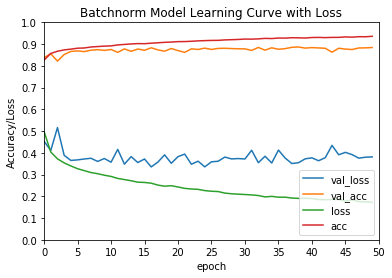

In [46]:
_ = pd.DataFrame(batch1.history).plot(
    title = 'Batchnorm Model Learning Curve with Loss',
    xticks = range(0,51,5),
    yticks = [0.1* x for x in range(0,11)]
)
_ = plt.legend(loc = 4)
_ = plt.xlabel('epoch')
_ = plt.ylabel('Accuracy/Loss')


#### Larger and deeper dropout batch norm. and residual connection model

In [47]:
# 6 layer model
num_class = 10

# define input layer
inputs = Input(shape=(28,28,1))

# flatten
flat = Flatten()(inputs)

# 1st Dense layer
L1_1 = Dense(512, activation='relu')(flat)
L1_2 = BatchNormalization()(L1_1)

# 2nd layer
L2_1 = Dense(512, activation='relu')(L1_2)
L2_2 = BatchNormalization()(L2_1)

# 3rd layer
L3_1 = Dense(512, activation='relu')(L2_2)
L3_2 = BatchNormalization()(L3_1)

# skip1
skip1 = add([L1_2, L3_2])

# 4th layer
L4_1 = Dense(512, activation='relu')(skip1)
L4_2 = BatchNormalization()(L4_1)

# 5th layer
L5_1 = Dense(512, activation='relu')(L4_2)
L5_2 = BatchNormalization()(L5_1)

#skip2
skip2 = add([skip1, L5_2])

# 6th layer
L6_1 = Dense(512, activation='relu')(skip2)
L6_2 = BatchNormalization()(L6_1)

# output layer
dense = Dense(num_class, activation='softmax')(L6_2)

# compile
model_batch2 = Model(inputs = inputs, outputs = dense)
model_batch2.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model_batch2.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 512)          401920      flatten_6[0][0]                  
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 512)          2048        dense_21[0][0]                   
__________________________________________________________________________________________________
dense_22 (

In [49]:
X_train_ = X_train.reshape(X_train.shape[0], 28, 28, 1)
batch2 = model_batch2.fit(X_train_, 
                          y_train, 
                          epochs=50, 
                          validation_split=10000/60000)


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 401us/step - loss: 0.5506 - acc: 0.8056 - val_loss: 0.4582 - val_acc: 0.8289
Epoch 2/50
50000/50000 [==============================] - 18s 366us/step - loss: 0.4273 - acc: 0.8462 - val_loss: 0.4013 - val_acc: 0.8556
Epoch 3/50
50000/50000 [==============================] - 19s 379us/step - loss: 0.3911 - acc: 0.8565 - val_loss: 0.3631 - val_acc: 0.8705
Epoch 4/50
50000/50000 [==============================] - 19s 386us/step - loss: 0.3614 - acc: 0.8686 - val_loss: 0.3579 - val_acc: 0.8719
Epoch 5/50
50000/50000 [==============================] - 19s 371us/step - loss: 0.3401 - acc: 0.8759 - val_loss: 0.3625 - val_acc: 0.8661
Epoch 6/50
50000/50000 [==============================] - 18s 364us/step - loss: 0.3203 - acc: 0.8821 - val_loss: 0.3983 - val_acc: 0.8582
Epoch 7/50
50000/50000 [==============================] - 18s 364us/step - loss: 0.3081 - acc: 0.8872 - val_loss: 0.

In [50]:
X_test_ = X_test.reshape(X_test.shape[0], 28, 28, 1)
print('Batch normalized model 2 test score:',
      model_batch2.evaluate(X_test_, y_test))


10000/10000 [==============================] - 1s 76us/step
Batch normalized model 2 test score: [0.4340573483712971, 0.8855]


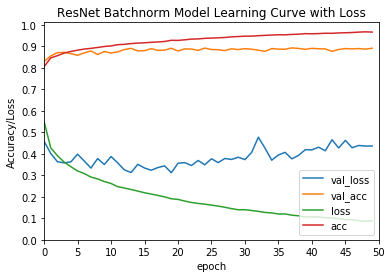

In [51]:
_ = pd.DataFrame(batch2.history).plot(
    title = 'ResNet Batchnorm Model Learning Curve with Loss',
    xticks = range(0,51,5),
    yticks = [0.1* x for x in range(0,11)]
)
_ = plt.legend(loc = 4)
_ = plt.xlabel('epoch')
_ = plt.ylabel('Accuracy/Loss')



# Visualization

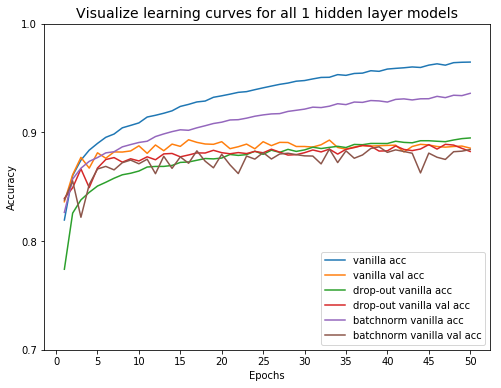

In [61]:
plt.figure(figsize=(8, 6))
_ = sns.lineplot(y = vanilla1.history['acc'], 
             x = range(1,51), label='vanilla acc')
_ = sns.lineplot(y = vanilla1.history['val_acc'], 
             x = range(1,51),label='vanilla val acc')
_ = sns.lineplot(y = dropout1.history['acc'], 
             x = range(1,51),label='drop-out vanilla acc')
_ = sns.lineplot(y = dropout1.history['val_acc'], 
             x = range(1,51),label='drop-out vanilla val acc')
_ = sns.lineplot(y = batch1.history['acc'], 
             x = range(1,51),label='batchnorm vanilla acc')
_ = sns.lineplot(y = batch1.history['val_acc'], 
             x = range(1,51),label='batchnorm vanilla val acc')

_ = plt.title('Visualize learning curves for all 1 hidden layer models',size=14)
_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')
_ = plt.yticks([x/10 for x in range(7,11)])
_ = plt.xticks(range(0,51,5))

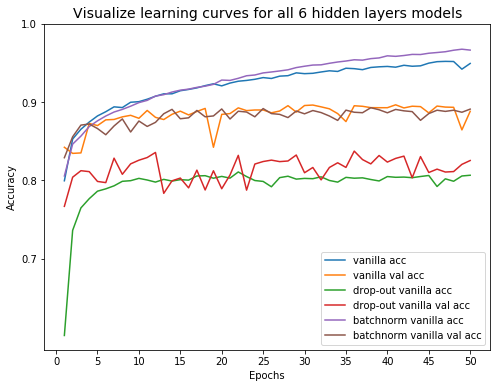

In [64]:
plt.figure(figsize=(8, 6))
_ = sns.lineplot(y = vanilla2.history['acc'], 
             x = range(1,51), label='vanilla acc')
_ = sns.lineplot(y = vanilla2.history['val_acc'], 
             x = range(1,51),label='vanilla val acc')
_ = sns.lineplot(y = dropout2.history['acc'], 
             x = range(1,51),label='drop-out vanilla acc')
_ = sns.lineplot(y = dropout2.history['val_acc'], 
             x = range(1,51),label='drop-out vanilla val acc')
_ = sns.lineplot(y = batch2.history['acc'], 
             x = range(1,51),label='batchnorm vanilla acc')
_ = sns.lineplot(y = batch2.history['val_acc'], 
             x = range(1,51),label='batchnorm vanilla val acc')

_ = plt.title('Visualize learning curves for all 6 hidden layers models',size=14)
_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')
_ = plt.yticks([x/10 for x in range(7,11)])
_ = plt.xticks(range(0,51,5))

# Summary 
In this task, we tested six models: a shallow (1 hidden layer) and a deeper (6 hidden layers) model for three model types:

1. Base model
2. Model with dropout
3. Model with batch normalization and residual connections (without dropout)

Our most successful model, in terms of validation set accuracy, was not surprisingly the deeper model with six hidden layers and batch normalization (without dropout). It approached the mid-to-upper 80s in accuracy. The vanilla model was nearly identical in validation set accuracy, and slightly below the training set accuracy of the batch normalization model. 

Drop out did not seem to be an effetcive strategy, as accuracy scores were considerably below those of the base model and the batch normalization model. It should be noted, however, that it was very effective at reducing the degree of overfitting, as the training and validation scores were nearly identical.


